<a href="https://colab.research.google.com/github/sangam0406/GEN-AI/blob/main/Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.8 MB/s eta 0:00:00


In [2]:
!pip install --quiet git+https://github.com/huggingface/diffusers.git@d420d71398d9c5a8d9a5f95ba2bdb6fe3d8ae31f
!pip install --quiet ipython-autotime
!pip install --quiet transformers==4.34.1 accelerate==0.24.0 safetensors==0.4.0
!pip install --quiet ipyplot
!pip install gradio
%load_ext autotime

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
allimages = pipe(prompt=prompt, negative_prompt=neg_prompt,guidance_scale=7.5,num_inference_steps=30,num_images_per_prompt=1).images

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


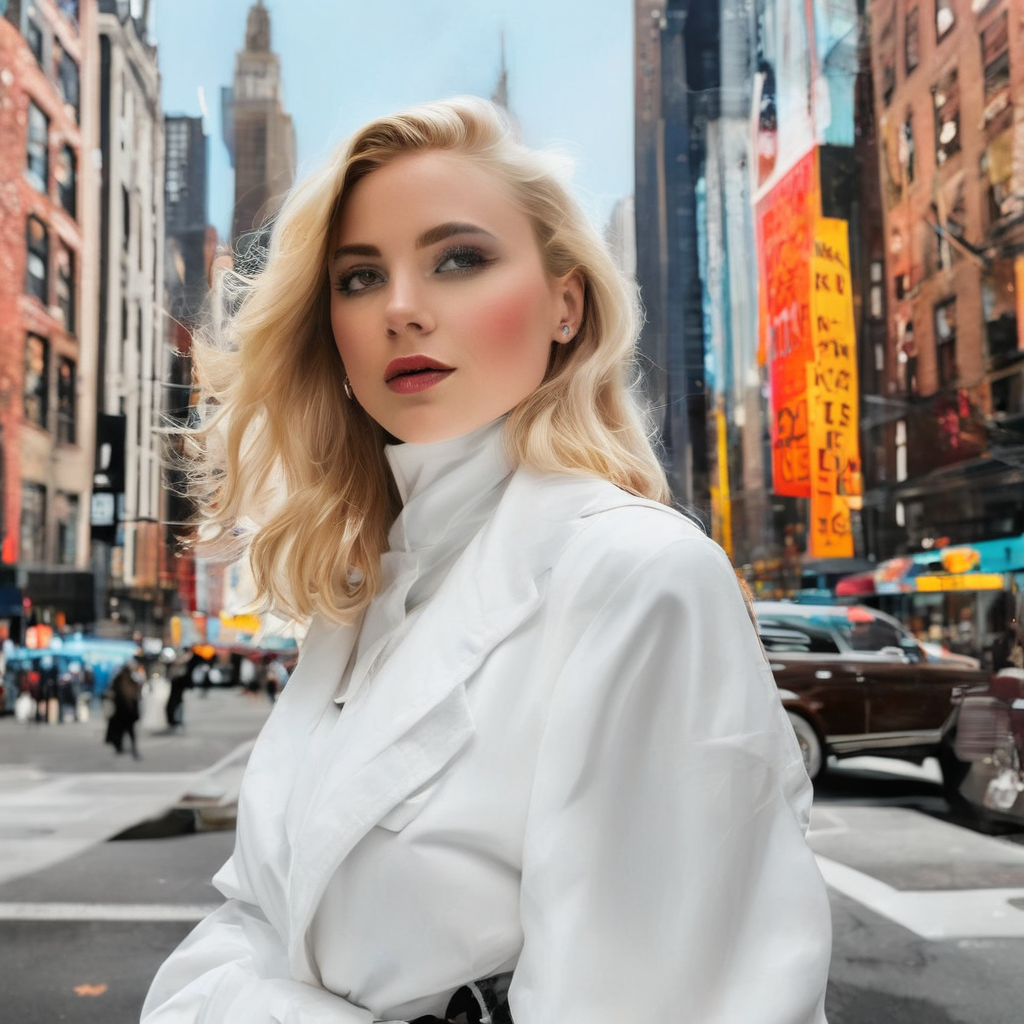


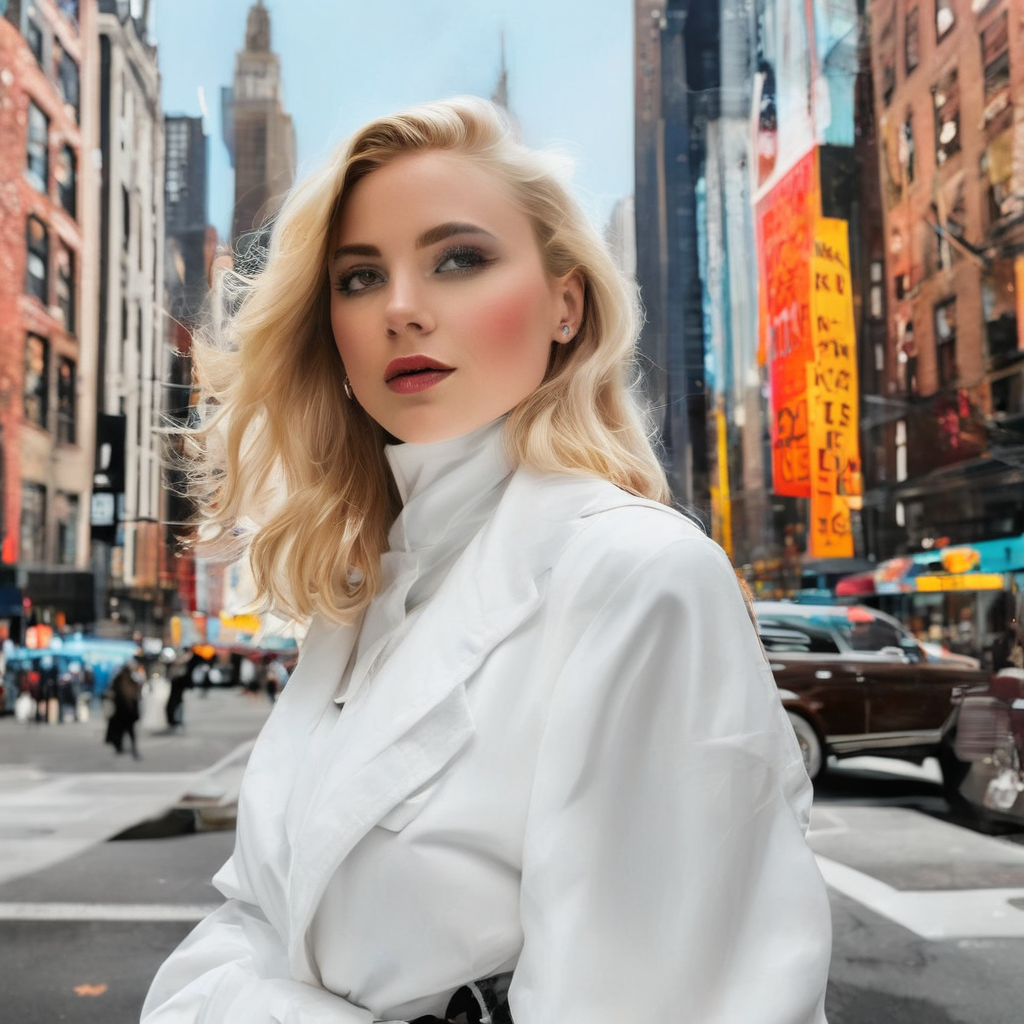

time: 31.8 s (started: 2024-01-28 11:38:56 +00:00)


In [6]:
from diffusers import StableDiffusionXLPipeline
import torch
import ipyplot


pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")


prompt = "a  white woman in new york ,best quality,colourful"
neg_prompt = "ugly, poorly Rendered face, low resolution"

image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

image.save("test.jpg")

ipyplot.plot_images([image],img_width=400)